# Assignment 2

## Data Wrangling II 

1. Create an “Academic performance” dataset of students and perform the following operations using Python. 

2. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 

3. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

4. Apply data transformations on at least one of the variables. 
   The purpose of this transformation should be one of the following reasons: 
   - to change the scale for better understanding of the variable, 
   - to convert a non-linear relation into a linear one, 
   - or to decrease the skewness and convert the distribution into a normal distribution. 

5. Reason and document your approach properly. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
  
import seaborn as sns
import random

### 1. Create an “Academic performance” dataset of students and perform the following operations using Python

In [2]:
data=pd.read_csv('datasets/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1020, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1020 non-null   object
 1   race/ethnicity               1020 non-null   object
 2   parental level of education  1020 non-null   object
 3   lunch                        1020 non-null   object
 4   test preparation course      1020 non-null   object
 5   math score                   1020 non-null   int64 
 6   reading score                1020 non-null   int64 
 7   writing score                1020 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 63.9+ KB


### Inserting NaN values randomly in data

In [6]:
new_data=data.copy(deep=True)
for col in new_data.columns:
    col_id=new_data.columns.get_loc(col)
    no_changes=random.randint(2,5)
    for i in range(no_changes):
        new_data.iat[i,col_id]=np.nan
    print(col,'\nNo of NaN values added = ',no_changes)

gender 
No of NaN values added =  2
race/ethnicity 
No of NaN values added =  5
parental level of education 
No of NaN values added =  5
lunch 
No of NaN values added =  3
test preparation course 
No of NaN values added =  3
math score 
No of NaN values added =  2
reading score 
No of NaN values added =  4
writing score 
No of NaN values added =  3


In [7]:
new_data.isnull().sum()

gender                         2
race/ethnicity                 5
parental level of education    5
lunch                          3
test preparation course        3
math score                     2
reading score                  4
writing score                  3
dtype: int64

In [8]:
print('Total number of missing values : ',new_data.isnull().sum().sum())

Total number of missing values :  27


## 2. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 


### Replace missing values with average value for math score, reading score & writing score   

In [9]:
for col in new_data.select_dtypes(exclude='object').columns:
    print('Total no of NaN values = ',new_data[col].isna().sum())
    #  Replace missing values with average value  
    avg_no=new_data[col].mean()
    new_data[col]=new_data[col].fillna(avg_no)
    print('Total no of NaN values after replacement = ',new_data[col].isna().sum())

Total no of NaN values =  2
Total no of NaN values after replacement =  0
Total no of NaN values =  4
Total no of NaN values after replacement =  0
Total no of NaN values =  3
Total no of NaN values after replacement =  0


### Replace missing values with modal value for lunch,  test preparation course


In [10]:
for col in ['lunch', 'test preparation course']:
    print('Total no of NaN values = ',new_data[col].isna().sum())
    #  Replace missing values with average value  
    mode_val=new_data[col].mode()[0]
    new_data[col]=new_data[col].fillna(mode_val)
    print('Total no of NaN values after replacement = ',new_data[col].isna().sum())

Total no of NaN values =  3
Total no of NaN values after replacement =  0
Total no of NaN values =  3
Total no of NaN values after replacement =  0


### Drop rows with missing values for gender, race/ethnicity, parental level of education 


In [11]:
for col in ['gender', 'race/ethnicity', 'parental level of education']:
    print('Total no of NaN values = ',new_data[col].isna().sum())
    #  Replace missing values with average value  
    new_data=new_data.dropna(subset=[col],axis=0,how='any')
    print('Total no of NaN values after deletion = ',new_data[col].isna().sum())

Total no of NaN values =  2
Total no of NaN values after deletion =  0
Total no of NaN values =  3
Total no of NaN values after deletion =  0
Total no of NaN values =  0
Total no of NaN values after deletion =  0


In [12]:
new_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 5 to 1019
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1015 non-null   object 
 1   race/ethnicity               1015 non-null   object 
 2   parental level of education  1015 non-null   object 
 3   lunch                        1015 non-null   object 
 4   test preparation course      1015 non-null   object 
 5   math score                   1015 non-null   float64
 6   reading score                1015 non-null   float64
 7   writing score                1015 non-null   float64
dtypes: float64(3), object(5)
memory usage: 71.4+ KB


In [14]:
new_data.shape

(1015, 8)

In [15]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(np.unique(data[col]),end='\n\n')

gender
['female' 'male']

race/ethnicity
['group A' 'group B' 'group C' 'group D' 'group E']

parental level of education
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']

lunch
['free/reduced' 'standard']

test preparation course
['completed' 'none']



In [16]:
new_data.describe()

,math score,reading score,writing score
count,1015.000000,1015.000000,1015.000000
mean,66.217734,69.095567,68.117241
std,15.766944,14.917648,15.478975
min,-3.000000,-2.000000,-10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,150.000000,103.000000,110.000000


## 3. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

## Finding outliers using Interquartile Range
### Outlier: 
- Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.

### Interquartile Range (IQR) 

- The IQR is the difference between the 75th and 25th percentile. 
- The IQR is more resistant to outliers.
- The IQR by definition only covers the middle 50% of the data, so outliers are well outside this range and the presence of a small number of outliers is not likely to change this significantly.

$$ IQR = Q3- Q1 $$
- A data point is an outlier if it satisfiews one of the following conditions: 

$$ Outlier < Q1 - 1.5(IQR)$$
$$ Outlier > Q3 + 1.5(IQR)$$

### Z- score

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
 $$ z=\frac{x-\mu}{\sigma}$$



In [17]:
def find_outliers_z(data,col):
    '''
    Find outlier values in single column data
        data - Series object
    returns
        outliers - List
    '''
    zsc=st.zscore(data[col])
    out=np.where(zsc<-3)
    outliers=data.iloc[out]
    out=np.where(zsc>3)
    outliers=outliers.append(data.iloc[out])
    
    ## we know scores can never be blow 0 and above 100 
    ## so we adjust threshold values if they are below 0 or above 100
    thresh1=0
    thresh2=100
    outliers=outliers.append(data.loc[(data[col]<thresh1)])
    outliers=outliers.append(data.loc[(data[col]>thresh2)])
    print('No of outliers based on ',col,' = ',outliers.shape[0])
    print(outliers[col])
    return outliers

def find_outliers_iqr(data,col):
    '''
    Find outlier values in single column data
        data - Series object
    returns
        outliers - List
    '''
    # Q1 - 25% 
    Q1=np.percentile(data[col],25)
    # Q3 - 75%
    Q3=np.percentile(data[col],75)
    IQR=Q3-Q1
    print('Q1 = %.2f\tQ3 = %.2f\tIQR = %.2f'%(Q1,Q3,IQR))
    
    ## we know scores can never be blow 0 and above 100 
    ## so we adjust threshold values if they are below 0 or above 100
    thresh1=max(0,Q1-(1.5*IQR))
    thresh2=min(100,Q3+(1.5*IQR))
    print('Threshold1 = ',thresh1,'\tThreshold2 = ',thresh2)
    outliers=data.loc[(data[col]<thresh1)]
    outliers=outliers.append(data.loc[(data[col]>thresh2)])
    print('No of outliers based on ',col,' = ',outliers.shape[0])
    print(outliers[col])
    return outliers

def remove_outliers(data,outliers):
    print('Size of dataframe before removing outliers : ',data.shape)
    n=data.drop(outliers.index)
    print('Size of dataframe after removing outliers : ',n.shape)
    return n

def handle_outliers(data,col,z=False):
    if z:
        outliers=find_outliers_z(data,col)
    else:
        outliers=find_outliers_iqr(data,col)
    plt.figure(figsize=(8,5))
    sns.histplot(data[col],bins=20)
    plt.title('Histogram of '+col)
    plt.xlabel(col)
    plt.ylabel('No of students')
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=data[col])
    plt.show()
    
    # remove outliers
    new_data=remove_outliers(data,outliers)
    
    plt.figure(figsize=(8,5))
    sns.histplot(new_data[col],bins=20)
    plt.title('Histogram of '+col+' after removing outliers')
    plt.xlabel(col)
    plt.ylabel('No of students')
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=new_data[col])
    plt.show()
    
    return new_data

### Handling outliers using IQR method

Q1 = 57.00	Q3 = 77.00	IQR = 20.00
Threshold1 =  27.0 	Threshold2 =  100
No of outliers based on  math score  =  14
17       18.0
59        0.0
145      22.0
338      24.0
466      26.0
787      19.0
842      23.0
980       8.0
1000     -3.0
1001    101.0
1005    105.0
1012    150.0
1016    124.0
1018    125.0
Name: math score, dtype: float64


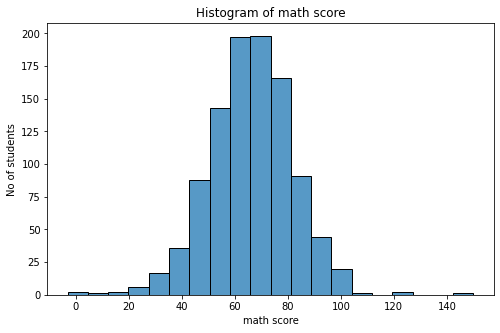

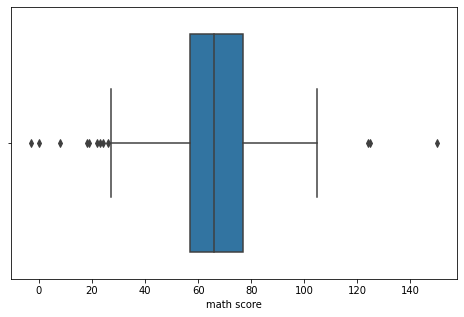

Size of dataframe before removing outliers :  (1015, 8)
Size of dataframe after removing outliers :  (1001, 8)


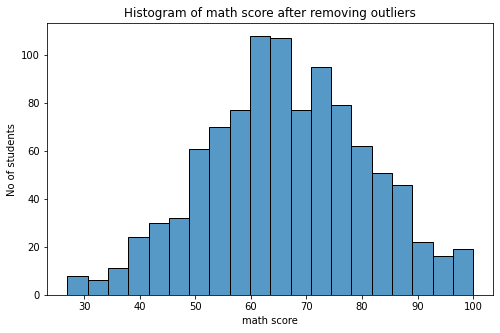

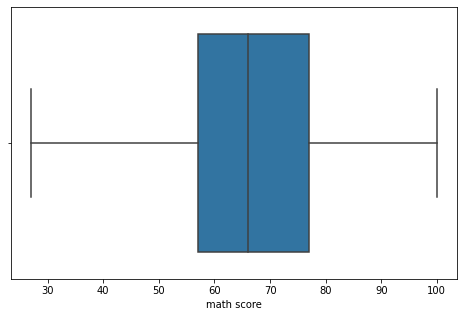

Q1 = 60.00	Q3 = 79.00	IQR = 19.00
Threshold1 =  31.5 	Threshold2 =  100
No of outliers based on  reading score  =  9
76       26.0
211      28.0
327      23.0
596      24.0
601      29.0
810      31.0
896      29.0
1002      5.0
1017    103.0
Name: reading score, dtype: float64


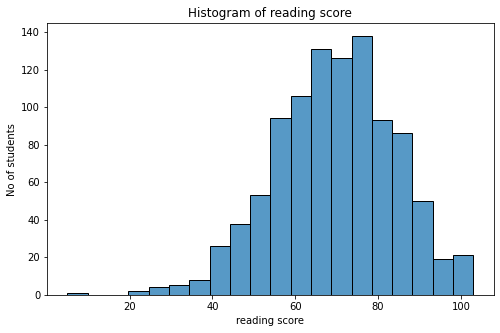

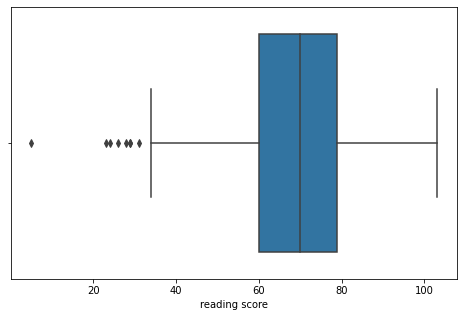

Size of dataframe before removing outliers :  (1001, 8)
Size of dataframe after removing outliers :  (992, 8)


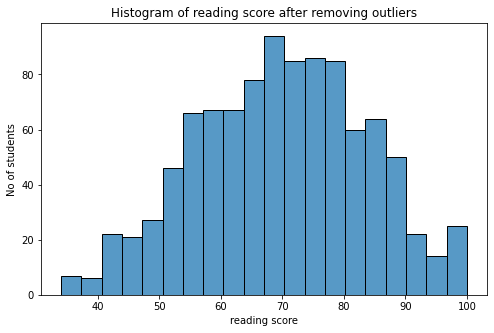

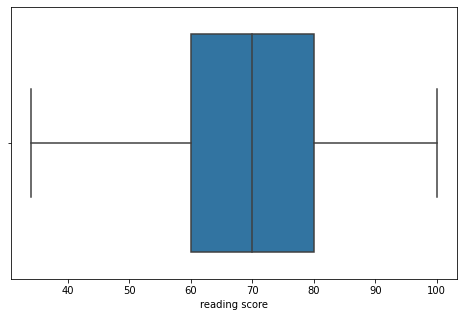

Q1 = 58.00	Q3 = 79.00	IQR = 21.00
Threshold1 =  26.5 	Threshold2 =  100
No of outliers based on  writing score  =  0
Series([], Name: writing score, dtype: float64)


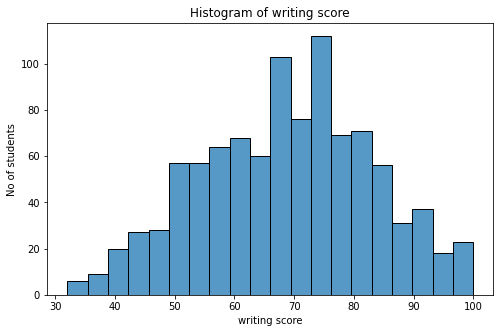

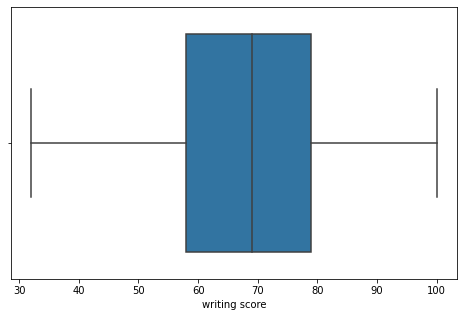

Size of dataframe before removing outliers :  (992, 8)
Size of dataframe after removing outliers :  (992, 8)


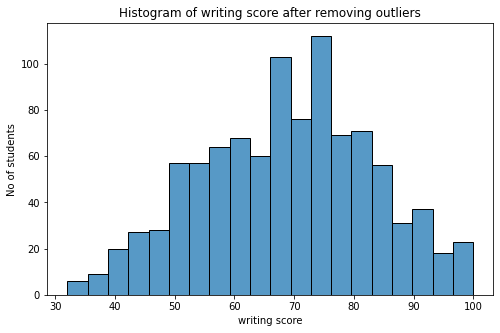

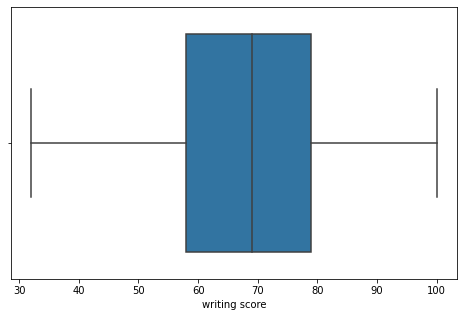

In [18]:
data_ch1=handle_outliers(new_data,'math score')
data_ch1=handle_outliers(data_ch1,'reading score')
data_ch1=handle_outliers(data_ch1,'writing score')

In [19]:
### Handling outliers using Z score method

No of outliers based on  math score  =  13
17       18.0
59        0.0
980       8.0
1000     -3.0
1012    150.0
1016    124.0
1018    125.0
1000     -3.0
1001    101.0
1005    105.0
1012    150.0
1016    124.0
1018    125.0
Name: math score, dtype: float64


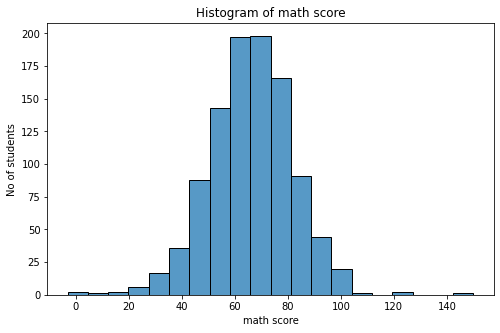

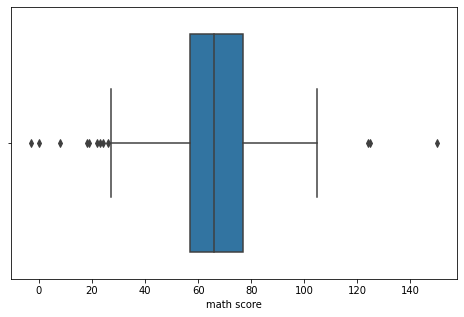

Size of dataframe before removing outliers :  (1015, 8)
Size of dataframe after removing outliers :  (1006, 8)


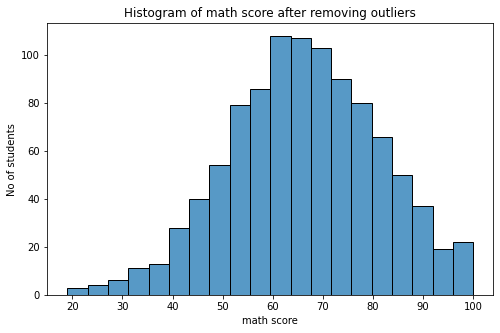

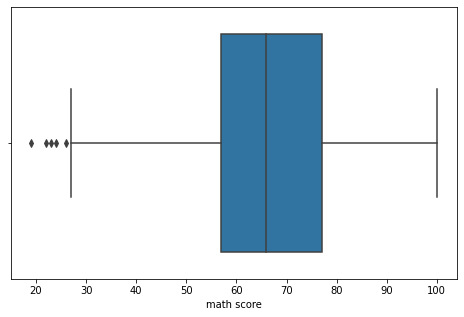

No of outliers based on  reading score  =  4
327      23.0
596      24.0
1002      5.0
1017    103.0
Name: reading score, dtype: float64


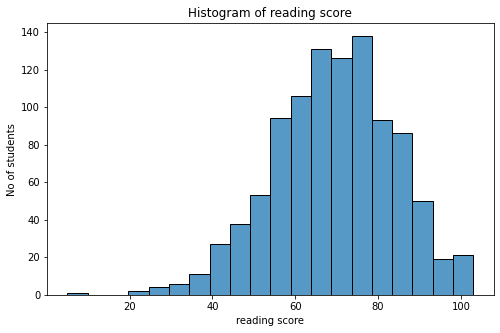

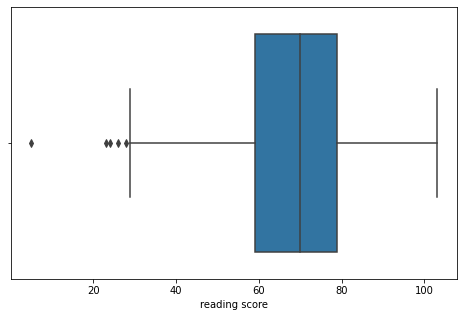

Size of dataframe before removing outliers :  (1006, 8)
Size of dataframe after removing outliers :  (1002, 8)


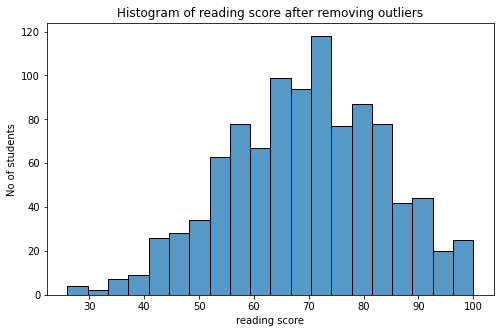

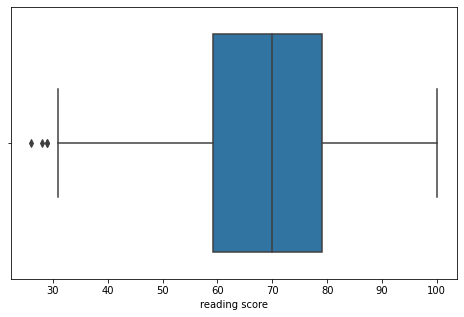

No of outliers based on  writing score  =  1
76    22.0
Name: writing score, dtype: float64


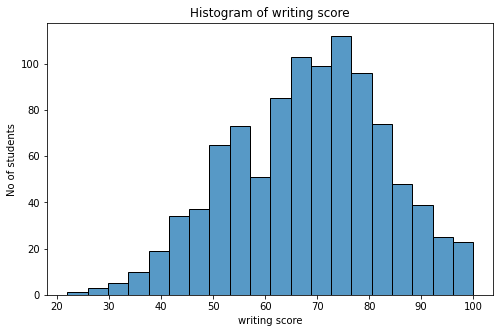

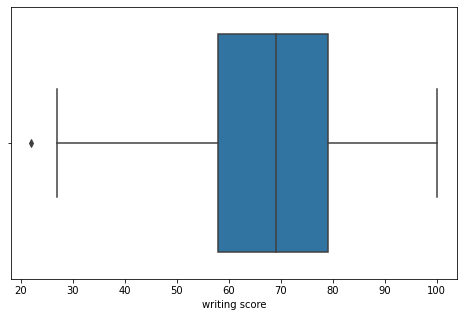

Size of dataframe before removing outliers :  (1002, 8)
Size of dataframe after removing outliers :  (1001, 8)


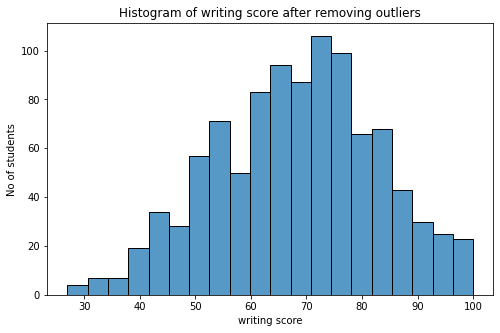

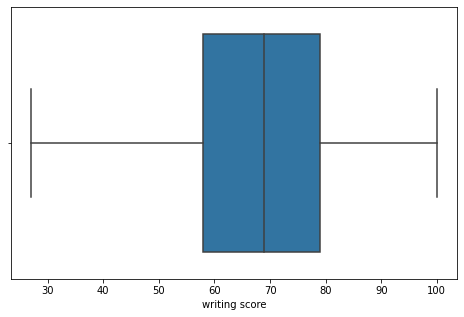

In [20]:
data_ch2=handle_outliers(new_data,'math score',z=True)
data_ch2=handle_outliers(data_ch2,'reading score',z=True)
data_ch2=handle_outliers(data_ch2,'writing score',z=True)

## Comparing data after applying both methods

In [21]:
data_ch1.describe()

,math score,reading score,writing score
count,992.000000,992.000000,992.000000
mean,66.639113,69.716734,68.688508
std,14.326691,13.829924,14.386013
min,27.000000,34.000000,32.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [22]:
data_ch2.describe()

,math score,reading score,writing score
count,1001.000000,1001.000000,1001.000000
mean,66.304695,69.396603,68.356643
std,14.715029,14.181451,14.744276
min,19.000000,28.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


## 4. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons:

- to change the scale for better understanding of the variable,
- to convert a non-linear relation into a linear one,
- or to decrease the skewness and convert the distribution into a normal distribution.

#### Skewness - 
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
- If skewness value lies above +1 or below -1, data is highly skewed.
- If it lies between +0.5 to -0.5, it is moderately skewed. 
- If the value is 0, then the data is symmetric

In [23]:
print('Skewness value of math score, reading score & writing score\n')
print(new_data[['math score','reading score','writing score']].skew(axis = 0, skipna = True))

print('\nSkewness value of math score, reading score & writing score\nAfter handling outliers\n')
print(data_ch1[['math score','reading score','writing score']].skew(axis = 0, skipna = True))

print('\nSkewness value of math score, reading score & writing score\nAfter handling outliers\n')
print(data_ch2[['math score','reading score','writing score']].skew(axis = 0, skipna = True))

print('\nKurtosis value of math score, reading score & writing score\n')
print(new_data[['math score','reading score','writing score']].kurt(axis = 0, skipna = True))

print('\nKurtosis value of math score, reading score & writing score\n')
print(data_ch1[['math score','reading score','writing score']].kurt(axis = 0, skipna = True))

print('\nKurtosis value of math score, reading score & writing score\nAfter handling outliers\n')
print(data_ch2[['math score','reading score','writing score']].kurt(axis = 0, skipna = True))

Skewness value of math score, reading score & writing score

math score      -0.084114
reading score   -0.393954
writing score   -0.362669
dtype: float64

Skewness value of math score, reading score & writing score
After handling outliers

math score      -0.023103
reading score   -0.069857
writing score   -0.078403
dtype: float64

Skewness value of math score, reading score & writing score
After handling outliers

math score      -0.123372
reading score   -0.148627
writing score   -0.151068
dtype: float64

Kurtosis value of math score, reading score & writing score

math score       1.364254
reading score    0.551765
writing score    0.473400
dtype: float64

Kurtosis value of math score, reading score & writing score

math score      -0.364173
reading score   -0.467957
writing score   -0.516004
dtype: float64

Kurtosis value of math score, reading score & writing score
After handling outliers

math score      -0.180599
reading score   -0.340788
writing score   -0.405550
dtype: float64

#### After handling outliers in given data, the skewness is reduced 
 - All columns have skewness values between +0.5 to -0.5, i.e. the data values are moderately negatively skewed
 - Removing the outliers has brought the skewness values close to zero thus making the data more symmetric

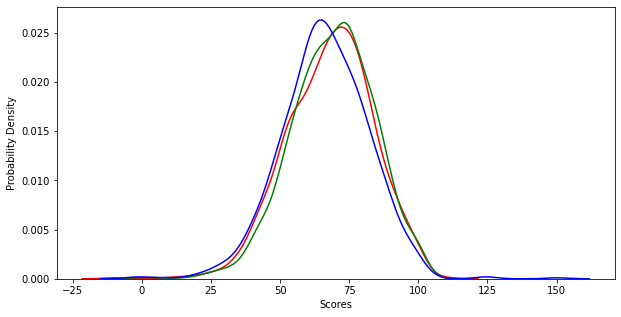

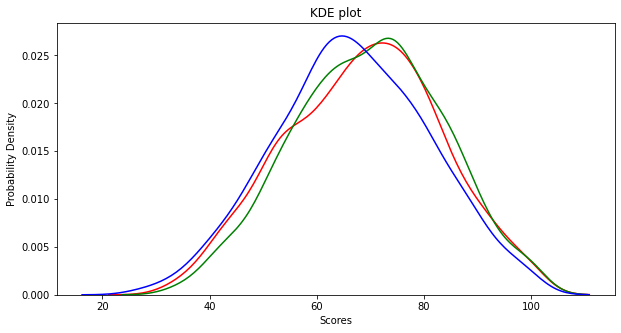

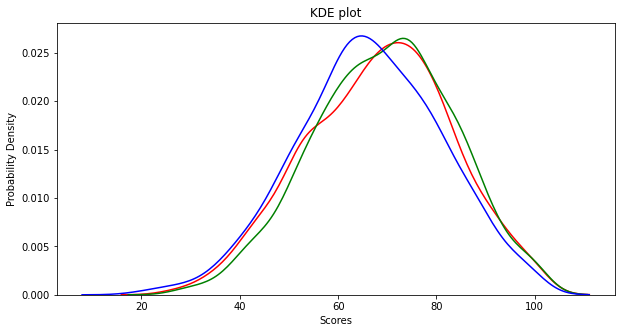

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(new_data['writing score'],color='r',label='Writing Score')
sns.kdeplot(new_data['reading score'],color='g',label='Reading Score')
sns.kdeplot(new_data['math score'],color='b',label='Math Score')
plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.show()
plt.figure(figsize=(10,5))
sns.kdeplot(data_ch1['writing score'],color='r',label='Writing Score')
sns.kdeplot(data_ch1['reading score'],color='g',label='Reading Score')
sns.kdeplot(data_ch1['math score'],color='b',label='Math Score')
plt.title('KDE plot')
plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.show()
plt.figure(figsize=(10,5))
sns.kdeplot(data_ch2['writing score'],color='r',label='Writing Score')
sns.kdeplot(data_ch2['reading score'],color='g',label='Reading Score')
sns.kdeplot(data_ch2['math score'],color='b',label='Math Score')
plt.title('KDE plot')
plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.show()

## Applying transformations to data

In [25]:
def normality_test(data):
    print('Skewness : ',data.skew())
    print('Kurtosis : ',data.kurt())
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data,color='b')
    plt.title('KDE plot')
    plt.xlabel('Scores')
    plt.ylabel('Probability Density')
    plt.subplot(1, 2, 2) 
    st.probplot(data,plot=plt,fit=True)
    plt.show()

Skewness :  -0.0698574728505697
Kurtosis :  -0.4679569379471684


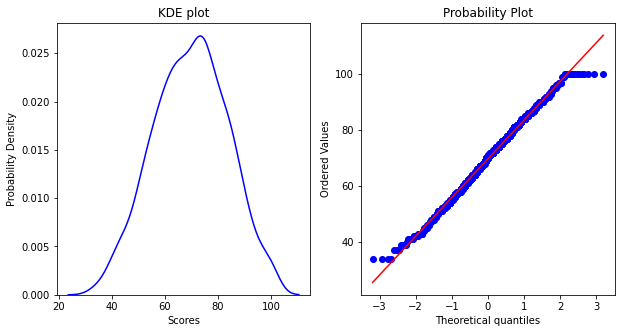

In [26]:
# Original Data of reading score
normality_test(data_ch1['reading score'])

Skewness :  -0.577523440444112
Kurtosis :  0.08886313135683466


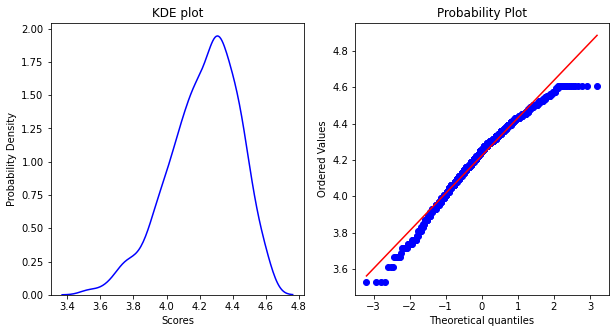

In [27]:
# Applying log transformation on reading score
data_sc=np.log(data_ch1['reading score'])
normality_test(data_sc)

Skewness :  0.3781305028116498
Kurtosis :  -0.3471899968511001


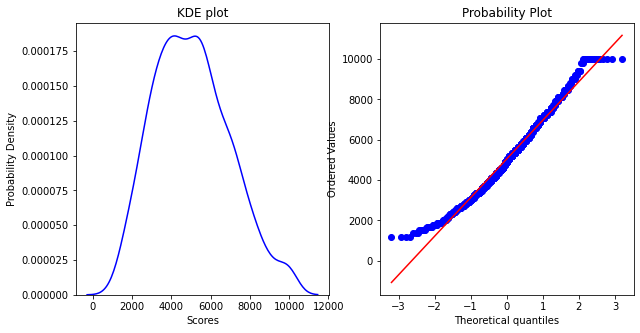

In [28]:
# Applying square transformation on reading score
data_sc=np.square(data_ch1['reading score'])
normality_test(data_sc)

Skewness :  -0.577523440444112
Kurtosis :  0.08886313135683466


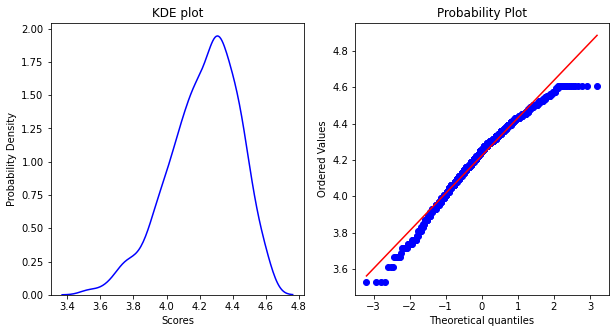

In [29]:
# Applying log transformation on reading score
data_sc=np.log(data_ch1['reading score'])
normality_test(data_sc)

Skewness :  -0.023103314036361376
Kurtosis :  -0.36417314111411425


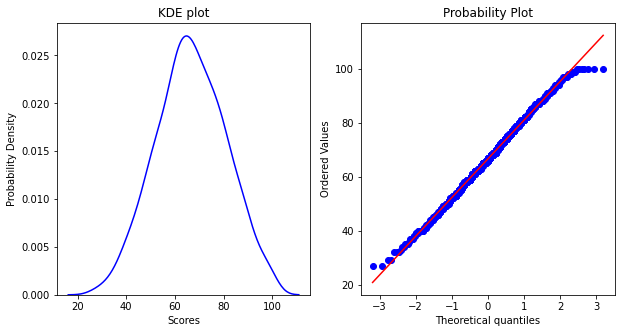

Skewness :  -0.02769600406247884
Kurtosis :  -0.3623125017914304


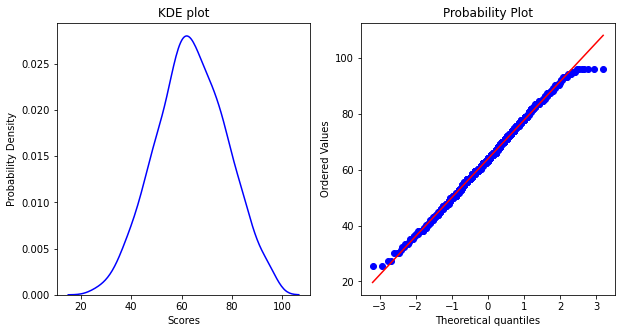

In [30]:
# transform training data & save lambda value
fitted_data, fitted_lambda = st.boxcox(data_ch1['math score'])
normality_test(data_ch1['math score'])
normality_test(pd.Series(fitted_data))